# *Lending Club Training*

In this tutorial, we will go through a step-by-step workflow to determine loan deliquency.  Predictions are made based on the information available at the time the loan was issued.  Our data is a portion of the public Lending Club dataset.

## Workflow

1. Start H2O-3 cluster
2. Import data
3. Clean data
4. Feature engineering
5. Model training
6. Examine model accuracy
7. Interpret model
8. Save and reuse model
9. AutoML (optional)
10. Stop H2O-3 cluster

# Step 1 (of 10). Start H2O-3 cluster

In [1]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_181"; Java(TM) SE Runtime Environment (build 1.8.0_181-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /usr/local/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/3v/0m8rhn8d417_8y2drh1dpwrh0000gn/T/tmpqh6dpyby
  JVM stdout: /var/folders/3v/0m8rhn8d417_8y2drh1dpwrh0000gn/T/tmpqh6dpyby/h2o_vaclav_started_from_python.out
  JVM stderr: /var/folders/3v/0m8rhn8d417_8y2drh1dpwrh0000gn/T/tmpqh6dpyby/h2o_vaclav_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Europe/London
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.9
H2O cluster version age:,27 days
H2O cluster name:,H2O_from_python_vaclav_77hhq1
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


# Step 2 (of 10). Import data

### View Data

In [2]:
# https://s3-us-west-2.amazonaws.com/h2o-tutorials/data/topics/lending/lending_club/LoanStats3a.csv
# Desc: https://www.kaggle.com/pragyanbo/a-hitchhiker-s-guide-to-lending-club-loan-data/notebook
loans = h2o.import_file("../../data/topics/lending/lending_club/LoanStats3a.csv",
                        col_types = {"int_rate":"string", 
                                     "revol_util":"string", 
                                     "emp_length":"string", 
                                     "verification_status":"string"})

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
loans.dim

[42538, 52]

In [4]:
loans.head()

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
1.0775e+06,1.2966e+06,5000,5000,4975,36 months,10.65%,162.87,B,B2,,10+ years,RENT,24000,VERIFIED - income,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01 00:00:00,1,,,3,0,13648,83.7%,9,f,0,0,5861.07,5831.78,5000,861.07,0,0,0,2015-01-01 00:00:00,171.62,,2015-01-01 00:00:00,0,,1
1.07743e+06,1.31417e+06,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,VERIFIED - income source,2011-12-01 00:00:00,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up. Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces,car,bike,309xx,GA,1,0,1999-04-01 00:00:00,5,,,3,0,1687,9.4%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,2013-04-01 00:00:00,119.66,,2013-09-01 00:00:00,0,,1
1.07718e+06,1.31352e+06,2400,2400,2400,36 months,15.96%,84.33,C,C5,,10+ years,RENT,12252,not verified,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,,small_business,real estate business,606xx,IL,8.72,0,2001-11-01 00:00:00,2,,,2,0,2956,98.5%,10,f,0,0,3003.65,3003.65,2400,603.65,0,0,0,2014-06-01 00:00:00,649.91,,2015-06-01 00:00:00,0,,1
1.07686e+06,1.27718e+06,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,VERIFIED - income source,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.",other,personel,917xx,CA,20,0,1996-02-01 00:00:00,1,35,,10,0,5598,21%,37,f,0,0,12226.3,12226.3,10000,2209.33,16.97,0,0,2015-01-01 00:00:00,357.48,,2015-01-01 00:00:00,0,,1
1.07536e+06,1.31175e+06,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,VERIFIED - income source,2011-12-01 00:00:00,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.",other,Personal,972xx,OR,17.94,0,1996-01-01 00:00:00,0,38,,15,0,27783,53.9%,38,f,1168.04,1168.04,2767.64,2767.64,1831.96,935.68,0,0,0,2015-06-01 00:00:00,67.79,2015-07-01 00:00:00,2015-06-01 00:00:00,0,,1
1.07527e+06,1.31144e+06,5000,5000,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000,VERIFIED - income source,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanD

### Filter Loans

Now we will filter out loans that are ongoing.  These are loans with loan status like "Current" and "In Grace Period".

In [5]:
num_unfiltered_loans = loans.dim[0]
num_unfiltered_loans

42538

In [6]:
loans["loan_status"].table().head(20)

loan_status,Count
Charged Off,5435
Current,3351
Default,7
Does not meet the credit policy. Status:Charged Off,761
Does not meet the credit policy. Status:Current,53
Does not meet the credit policy. Status:Fully Paid,1933
Does not meet the credit policy. Status:In Grace Period,2
Fully Paid,30843
In Grace Period,60
Late (16-30 days),16


In [7]:
ongoing_status = ["Current",
                  "In Grace Period",
                  "Late (16-30 days)",
                  "Late (31-120 days)"]
loans = loans[~loans["loan_status"].isin(ongoing_status)]

In [8]:
num_filtered_loans = loans.dim[0]
num_filtered_loans

39037

In [9]:
num_loans_filtered_out = num_unfiltered_loans - num_filtered_loans
num_loans_filtered_out

3501

### Create Response Column

Our response column will be called: `bad_loan`.  The `bad_loan` column will be positive if the loan was not completely paid off.

In [10]:
loans["bad_loan"] = ~(loans["loan_status"] == "Fully Paid")
loans["bad_loan"] = loans["bad_loan"].asfactor() # convert to enum/factor

In [11]:
bad_loan_dist = loans["bad_loan"].table()
bad_loan_dist["Percentage"] = (100 * bad_loan_dist["Count"] / loans.nrow).round()
bad_loan_dist

bad_loan,Count,Percentage
0,30843,79
1,8194,21


About one in five loans eventually become bad.

# Step 3 (of 10).  Clean data

We have multiple columns that are numeric but are being treated as string because of their syntax.  In this section, we will convert these to numeric.  Our machine learning models will have a greater ability to understand numeric features than strings.

In [12]:
loans[["int_rate", "revol_util", "emp_length"]].head()

int_rate,revol_util,emp_length
10.65%,83.7%,10+ years
15.27%,9.4%,< 1 year
15.96%,98.5%,10+ years
13.49%,21%,10+ years
7.90%,28.3%,3 years
18.64%,87.5%,9 years
21.28%,32.6%,4 years
12.69%,36.5%,< 1 year
14.65%,20.6%,5 years
12.69%,67.1%,10+ years


In [13]:
# Convert int_rate to numeric
loans["int_rate"] = loans["int_rate"].gsub(pattern = "%", replacement = "") # strip %
loans["int_rate"] = loans["int_rate"].trim() # trim ws
loans["int_rate"] = loans["int_rate"].asnumeric() # change to a numeric 

In [14]:
loans["int_rate"].head()

int_rate
10.65
15.27
15.96
13.49
7.9
18.64
21.28
12.69
14.65
12.69


Now that we have converted interest rate to numeric, we can use the `hist` function to see the distribution of interest rate for good loans and bad loans.

Bad Loans


/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


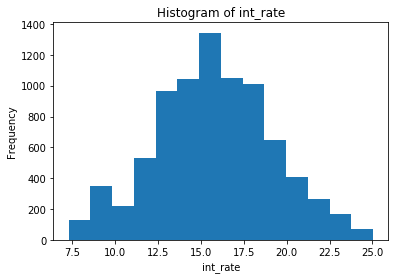

Good Loans


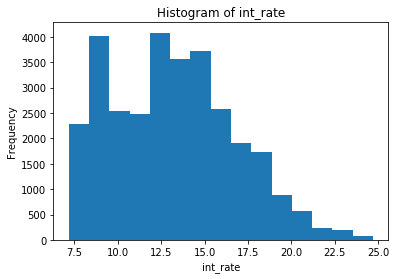

In [15]:
%matplotlib inline

print("Bad Loans")
loans[loans["bad_loan"] == "1", "int_rate"].hist()

print("Good Loans")
loans[loans["bad_loan"] == "0", "int_rate"].hist()

 The distribution of interest rate is very different for good loans.  This may be a helpful predictor in our model.

In [16]:
# Convert revol_util to numeric
loans["revol_util"] = loans["revol_util"].gsub(pattern="%", replacement="") # strip %
loans["revol_util"] = loans["revol_util"].trim() # trim ws
loans["revol_util"] = loans["revol_util"].asnumeric() #change to a numeric 

In [17]:
# Convert emp_length to numeric
# Use gsub to remove " year" and " years" also translate n/a to "" 
loans["emp_length"] = loans["emp_length"].gsub(pattern="([ ]*+[a-zA-Z].*)|(n/a)", replacement="") 

# Use trim to remove any trailing spaces 
loans["emp_length"] = loans["emp_length"].trim()

# Convert emp_length to numeric 
# Use sub to convert < 1 to 0 years and do the same for 10 + to 10
# Hint: Be mindful of spaces between characters
loans["emp_length"] = loans["emp_length"].gsub(pattern="< 1", replacement="0")
loans["emp_length"] = loans["emp_length"].gsub(pattern="10\\+", replacement="10")
loans["emp_length"] = loans["emp_length"].asnumeric()

In [18]:
loans[["int_rate", "revol_util", "emp_length"]].head()

int_rate,revol_util,emp_length
10.65,83.7,10
15.27,9.4,0
15.96,98.5,10
13.49,21,10
7.9,28.3,3
18.64,87.5,9
21.28,32.6,4
12.69,36.5,0
14.65,20.6,5
12.69,67.1,10


We can also clean up the verification status column. There are multiple values that mean verified: `VERIFIED - income` and `VERIFIED - income source`.  We will replace these values with `verified`.

In [19]:
loans["verification_status"].head()

verification_status
VERIFIED - income
VERIFIED - income source
not verified
VERIFIED - income source
VERIFIED - income source
VERIFIED - income source
VERIFIED - income source
VERIFIED - income
not verified
VERIFIED - income source


In [20]:
loans["verification_status"] = loans["verification_status"].sub(pattern="VERIFIED - income source", 
                                                                replacement="verified")
loans["verification_status"] = loans["verification_status"].sub(pattern="VERIFIED - income", 
                                                                replacement="verified")
loans["verification_status"] = loans["verification_status"].asfactor()

In [21]:
loans["verification_status"].table()

verification_status,Count
not verified,17965
verified,21069


# Step 4 (of 10).  Feature engineering

Now that we have cleaned our data, we can add some new columns to our dataset that may help improve the performance of our supervised learning models.

The new columns we will create are: 
* `credit_length`: the time from their earliest credit line to when they were issued the loan
* `issue_d_year` and `issue_d_month`: extract year and month from the issue date
* word embeddings from the loan description

### Credit Length

We can extract the credit length by subtracting the year they had their earliest credit line from the year when they issued the loan.

In [22]:
loans["credit_length"] = loans["issue_d"].year() - loans["earliest_cr_line"].year()
loans["credit_length"].head()

credit_length
26
12
10
15
7
4
7
7
13
22


### Issue Date Expansion

We can extract the year and month from the issue date.  We may find that the month or the year when the loan was issued can impact the probability of a bad loan.

In [23]:
loans["issue_d_year"] = loans["issue_d"].year()
loans["issue_d_month"] = loans["issue_d"].month().asfactor()  # we will treat month as a enum/factor since its cyclical

In [24]:
loans[["issue_d_year", "issue_d_month"]].head()

issue_d_year,issue_d_month
2011,12
2011,12
2011,12
2011,12
2011,12
2011,12
2011,12
2011,12
2011,12
2011,12


### Word Embeddings

One of the columns in our dataset is a description of why the loan was requested. The first few descriptions in the dataset are shown below.

In [25]:
loans["desc"].head()

desc
Borrower added on 12/22/11 > I need to upgrade my business technologies.
Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up. Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces
""
"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time."
""
Borrower added on 12/16/11 > Downpayment for a car.
Borrower added on 12/21/11 > I own a small home-based judgment collection business. I have 5 years experience collecting debts. I am now going from a home office to a small office. I also plan to buy a small debt portfolio (eg. $10K for $1M of debt) My score is not A+ because I own my home and have no mortgage.
"Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother and have no car payment or credit cards. I am in community college and work full time. Im going to use the money to make some repairs around the house and get some maintenance done on my car. Borrower added on 12/20/11 > $1000 down only $4375 to go. Thanks to everyone that invested so far, looking forward to surprising my brother with the fixes around the house."
"Borrower added on 12/15/11 > I had recived a loan from Citi Financial about a year ago, I was paying 29.99 intrest, so the refinance is to cut that rate since cleaning up my credit I have been paying everything on time as shown on my credit report"
""


This information may be important to the model but supervised learning algorithms have a hard time understanding text.  Instead we will convert these strings to a numeric vector using the Word2Vec algorithm.

In [26]:
STOP_WORDS = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what",
              "there","all","we","one","the","a","an","of","or","in","for","by","on",
              "but","is","in","a","not","with","as","was","if","they","are","this","and","it","have",
              "from","at","my","be","by","not","that","to","from","com","org","like","likes","so"]

In [27]:
def tokenize(sentences, stop_word = STOP_WORDS):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) | (~ tokenized_words.isin(STOP_WORDS)),:]
    return tokenized_words

In [28]:
# Break loan description into sequence of words
words = tokenize(loans["desc"].ascharacter())

In [29]:
# Train Word2Vec Model
from h2o.estimators.word2vec import H2OWord2vecEstimator

w2v_model = H2OWord2vecEstimator(vec_size=100, model_id="w2v")
w2v_model.train(training_frame=words)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [30]:
# Sanity check - find synonyms for the word 'car'
w2v_model.find_synonyms("car", count=5)

OrderedDict([('auto', 0.7661802172660828),
             ('prius', 0.7268932461738586),
             ('vehicle', 0.7039517164230347),
             ('lexus', 0.6879216432571411),
             ('camry', 0.6847907900810242)])

In [31]:
# Calculate a vector for each description
desc_vecs = w2v_model.transform(words, aggregate_method="AVERAGE")

In [32]:
desc_vecs.head()

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
0.0836695,-0.0817539,0.360628,0.0223681,-0.164635,0.0370864,0.0171906,-0.0941359,-0.19008,-0.115075,0.0258008,-0.00644388,0.120031,0.102899,0.207701,0.024139,0.195,0.0577611,0.0745291,0.26081,0.0803937,-0.0431684,0.0334779,0.0845784,0.00249489,-0.0239965,-0.0880977,-0.0456045,-0.0334999,-0.0556571,-0.0969345,-0.0271324,0.0404169,-0.0646209,0.00992863,-0.0208477,-0.0107305,-0.0261914,0.0545937,-0.0973381,0.0152452,-0.0795725,0.175629,0.0446624,0.0777462,0.159542,-0.0584466,-0.0124511,-0.080818,-0.149314,-0.166154,0.0114795,0.104046,-0.015393,0.0843416,0.154527,0.261841,0.319493,-0.0369598,-0.112576,-0.107305,-0.114114,-0.182366,0.00656933,-0.0178717,-0.243051,0.0153107,0.305674,0.0366446,-0.127634,0.0808877,0.177527,-0.0116961,0.0741436,0.175798,-0.029941,-0.103959,-0.126443,-0.0516729,-0.0406855,0.207899,-0.0267431,-0.30548,0.149796,-0.0776121,-0.0532048,-0.0924424,-0.0219921,-0.0636509,0.111871,0.0628326,-0.00666819,0.165138,-0.0570254,0.30952,-0.283357,0.00236311,-0.0461503,0.0569163,0.0653391
0.121089,-0.171846,0.285698,0.0471206,-0.127764,-0.0259096,0.0778445,0.128335,-0.154788,-0.205392,0.0528819,-0.0410191,0.0130281,-0.00110759,0.200021,-0.0156933,0.202692,-0.0790365,0.0930438,0.22288,0.172615,-0.109606,-0.123911,-0.0206318,-0.0537904,-0.0391339,-0.00267988,-0.116033,-0.222657,-0.0383557,-0.167224,-0.159688,-0.00889612,0.0602165,0.091327,0.118171,-0.0198304,0.0659383,0.0482891,0.0499668,0.063742,-0.0201654,0.0703766,0.0283367,0.0189803,0.1045,-0.0762011,0.0747158,-0.0523145,-0.0694044,-0.0205976,0.0047126,0.086493,-0.111612,0.0705645,0.181155,0.177858,0.228152,-0.175741,0.0534326,-0.104615,-0.0924659,-0.0358965,0.0016598,-0.0190739,-0.0768712,-0.0470786,0.217908,-0.0200498,0.0463361,0.0658901,0.0499424,-0.0542084,0.00685412,0.141012,-0.101979,-0.134568,0.00183739,0.0196932,-0.00938851,0.0529368,-0.0915929,-0.330301,0.0251588,-0.0320234,-0.015179,0.0713586,0.00547901,-0.0893694,0.117805,-0.139384,0.021314,-0.0283016,-0.127017,0.182104,-0.172562,-0.0177992,0.0290303,0.0514832,-0.0581409
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.0141338,-0.261649,0.231279,0.0485102,-0.0780662,0.0807379,-0.00167018,0.0697997,-0.177843,-0.17021,0.0624306,-0.0681573,0.0170254,0.0907775,0.233797,-0.00439661,0.209308,-0.0894992,0.120799,0.28373,0.088199,-0.0491062,-0.132474,0.0469662,0.0309243,-0.132142,0.0698994,-0.133795,-0.122146,-0.0376473,-0.164203,-0.127841,0.0976913,0.0609939,0.0510156,0.0944039,0.0126015,0.0640747,0.0855526,0.00326563,0.0723178,-0.00541087,0.0692994,0.0128242,0.0367325,0.220869,-0.023613,0.086601,-0.0193324,-0.145319,-0.13072,-0.046461,0.0199847,-0.140493,0.0765519,0.175348,0.133331,0.291384,-0.0550459,0.131958,-0.0413605,-0.0955926,-0.074971,0.0792084,-0.0168996,-0.135488,-0.0842225,0.263868,0.0345704,-0.0395513,0.0822263,0.0113673,-0.00662043,-0.0456272,0.161789,-0.0499275,-0.0990675,-0.133017,0.0764887,0.0265732,0.0828815,0.0319307,-0.228668,0.114003,-0.0617873,0.118847,0.0258825,-0.0470378,-0.137613,0.142315,-0.0707471,-0.0504307,-0.00774345,-0.105118,0.161663,-0.144742,0.0562337,0.0219123,0.0708247,0.0637119
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

In [33]:
# Add aggregated word embeddings 
loans = loans.cbind(desc_vecs)

# Step 5 (of 10). Model training

Now that we have cleaned our data and added new columns, we will train a model to predict bad loans.

In [34]:
train, test = loans.split_frame(seed=25, ratios=[0.75])

In [35]:
from h2o.estimators import H2OGradientBoostingEstimator

cols_to_remove = ["initial_list_status",
                  "out_prncp",
                  "out_prncp_inv",
                  "total_pymnt",
                  "total_pymnt_inv",
                  "total_rec_prncp", 
                  "total_rec_int",
                  "total_rec_late_fee",
                  "recoveries",
                  "collection_recovery_fee",
                  "last_pymnt_d", 
                  "last_pymnt_amnt",
                  "next_pymnt_d",
                  "last_credit_pull_d",
                  "collections_12_mths_ex_med" , 
                  "mths_since_last_major_derog",
                  "policy_code",
                  "loan_status",
                  "funded_amnt",
                  "funded_amnt_inv",
                  "mths_since_last_delinq",
                  "mths_since_last_record",
                  "id",
                  "member_id",
                  "desc",
                  "zip_code"]

predictors = list(set(loans.col_names) - set(cols_to_remove))

In [36]:
predictors

['int_rate',
 'pymnt_plan',
 'C20',
 'C66',
 'C62',
 'C76',
 'open_acc',
 'C54',
 'C70',
 'C2',
 'C96',
 'C55',
 'grade',
 'C72',
 'C98',
 'C85',
 'C43',
 'C31',
 'C99',
 'revol_util',
 'C61',
 'issue_d_year',
 'term',
 'verification_status',
 'C33',
 'home_ownership',
 'C90',
 'C91',
 'purpose',
 'C78',
 'C9',
 'C36',
 'credit_length',
 'pub_rec',
 'installment',
 'C7',
 'C21',
 'C84',
 'C28',
 'C52',
 'C87',
 'C57',
 'C92',
 'C100',
 'C94',
 'C35',
 'C83',
 'C40',
 'emp_length',
 'C15',
 'C68',
 'C69',
 'C25',
 'C37',
 'C4',
 'earliest_cr_line',
 'C22',
 'C14',
 'C75',
 'C18',
 'C3',
 'C12',
 'C58',
 'C73',
 'C27',
 'C6',
 'C5',
 'C81',
 'C59',
 'C10',
 'C26',
 'title',
 'C41',
 'C11',
 'C45',
 'C64',
 'C67',
 'C95',
 'addr_state',
 'C63',
 'C97',
 'C77',
 'inq_last_6mths',
 'C53',
 'C86',
 'issue_d',
 'C71',
 'annual_inc',
 'C50',
 'dti',
 'C49',
 'C65',
 'C74',
 'C47',
 'C23',
 'C44',
 'C24',
 'C60',
 'C51',
 'C19',
 'loan_amnt',
 'delinq_2yrs',
 'C29',
 'C30',
 'C82',
 'issue_d_mo

In [37]:
gbm_model = H2OGradientBoostingEstimator(stopping_metric="logloss",
                                         stopping_rounds= 5,  # early stopping
                                         score_tree_interval=5,
                                         ntrees=500,
                                         model_id="gbm",
                                         nfolds=5,
                                         seed=25,
                                         fold_assignment='stratified')
gbm_model.train(x=predictors,
                y="bad_loan",
                training_frame=train,
                validation_frame=test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


# Step 7 (of 10).  Examine model accuracy

The plot below shows the performance of the model as more trees are built.  This graph can help us see if our model is overfitting.  Our early stopping kicked in at 100 trees.  This is where the model was no longer improving performance on the test data.

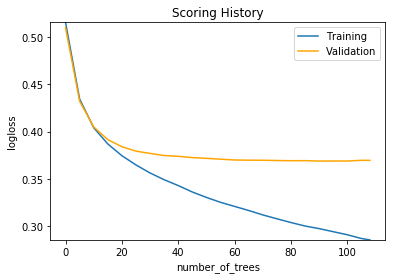

In [38]:
%matplotlib inline
gbm_model.plot()

The ROC curve of the training and testing data are shown below.  The area under the ROC curve is much higher for the training data than the testing data indicating that the model may be beginning to memorize the training data.

Training Data


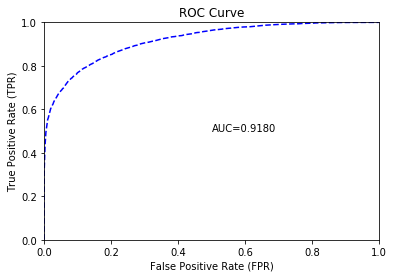

Testing Data


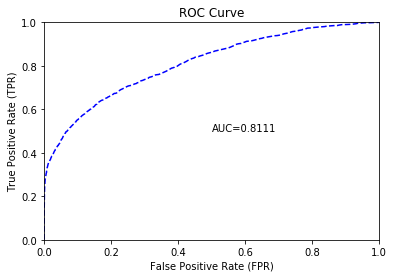

X-Val


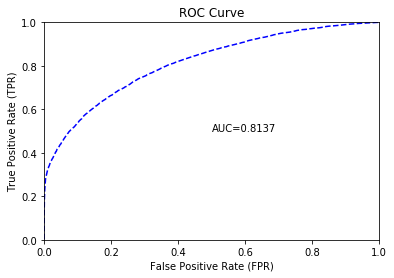

In [39]:
print("Training Data")
gbm_model.model_performance(train = True).plot()
print("Testing Data")
gbm_model.model_performance(valid = True).plot()
print("X-Val")
gbm_model.model_performance(xval=True).plot()

# Step 7 (of 10). Interpret model

The variable importance plot shows us which variables are most important to predicting `bad_loan`.  We can use partial dependency plots to learn more about how these variables affect the prediction.

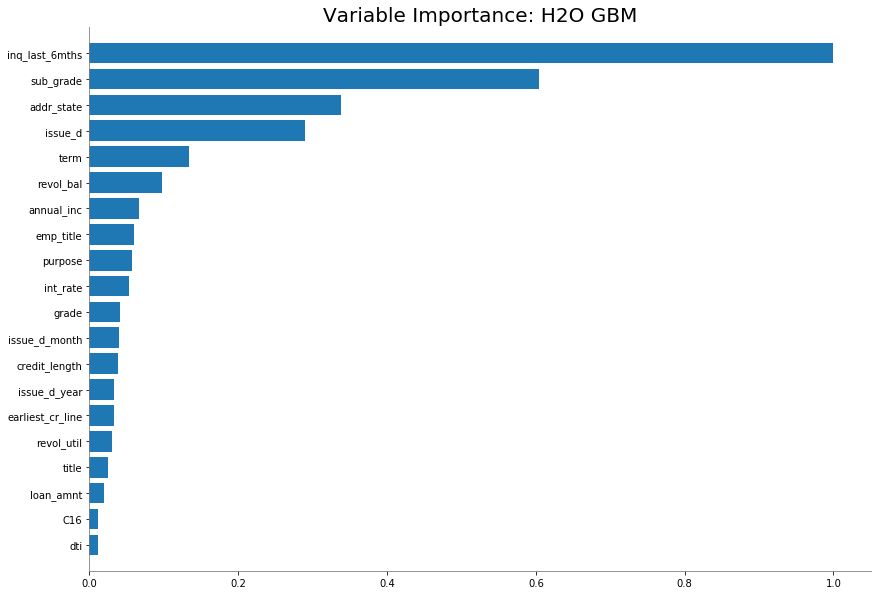

In [40]:
gbm_model.varimp_plot(20)

The partial dependency plot of the `inq_last_6mths` predictor shows us that, as the number of inquiries in the last 6 months increases, the likelihood of the loan defaulting also increases.

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


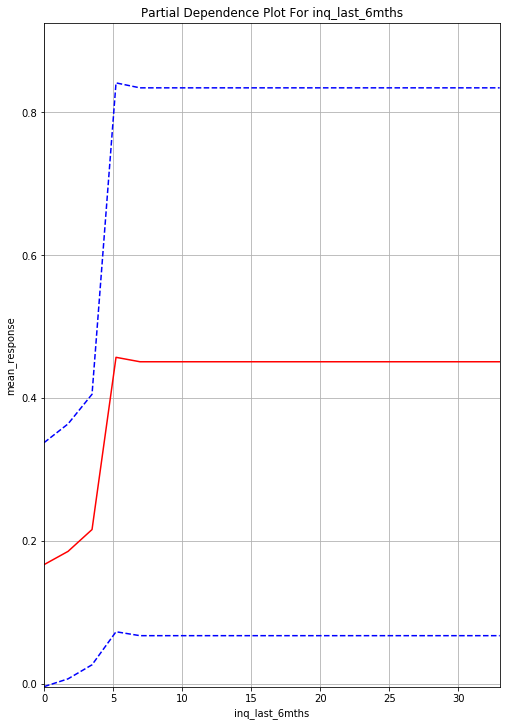

In [41]:
pdp = gbm_model.partial_plot(cols=["inq_last_6mths"], data=train)

In [42]:
loans["inq_last_6mths"].table().head(100)

inq_last_6mths,Count
0,17910
1,10288
2,5480
3,2942
4,1022
5,590
6,335
7,181
8,112
9,50


# Step 8 (of 10). Save and reuse model

The model can either be embedded into a self-contained Java MOJO/POJO package
or it can be saved and later loaded directly in H2O-3 cluster. For production
use, we recommend to use MOJO as it is optimised for speed. See the [guide](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/productionizing.html) for further information.

### Downloading MOJO

In [43]:
gbm_model.download_mojo()

'/Users/vaclav/Projects/h2o-tutorials/training/h2o_3_hands_on/lending_club_loan_default/gbm.zip'

### Save and reuse the model 

We can save the model to disk for later batch scoring in H2O cluster.

In [44]:
model_path = h2o.save_model(model=gbm_model, force=True)
print(model_path)
loaded_model = h2o.load_model(path=model_path)

/Users/vaclav/Projects/h2o-tutorials/training/h2o_3_hands_on/lending_club_loan_default/gbm


We can also score new data using the predict function:

In [45]:
bad_loan_hat = loaded_model.predict(test)
bad_loan_hat.head(15)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.770768,0.229232
0,0.97823,0.0217698
0,0.779202,0.220798
1,0.692422,0.307578
0,0.90796,0.0920404
0,0.849256,0.150744
0,0.953469,0.0465313
0,0.859905,0.140095
0,0.975422,0.0245779
0,0.81853,0.18147


# Step 9 (of 10). AutoML (optional)
AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit. Stacked Ensembles will be automatically trained on collections of individual models to produce highly predictive ensemble models.

In [46]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_runtime_secs=180, seed=25)
aml.train(x=predictors, y='bad_loan', training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


The leaderboard contains the performance metrics of the models generated by AutoML:

In [47]:
aml.leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_0_AutoML_20181029_100246,0.812932,0.379635,0.273783,0.340542,0.115969
StackedEnsemble_BestOfFamily_0_AutoML_20181029_100246,0.810946,0.381195,0.275789,0.341391,0.116548
GBM_grid_0_AutoML_20181029_100246_model_0,0.80722,0.381229,0.282642,0.341803,0.116829
GBM_grid_0_AutoML_20181029_100246_model_1,0.806155,0.381768,0.285403,0.341901,0.116896
GBM_grid_0_AutoML_20181029_100246_model_2,0.803637,0.386695,0.285324,0.343677,0.118114
GLM_grid_0_AutoML_20181029_100246_model_0,0.788143,0.414668,0.285814,0.360539,0.129988
DRF_0_AutoML_20181029_100246,0.787648,0.404452,0.294772,0.35181,0.123771
XRT_0_AutoML_20181029_100246,0.779264,0.415708,0.303599,0.357996,0.128161


Since we provided only training frame during training, the models are sorted by their cross-validated performance metrics (AUROC by default for classification). We can evaluate the best model (`leader`) on the test data:

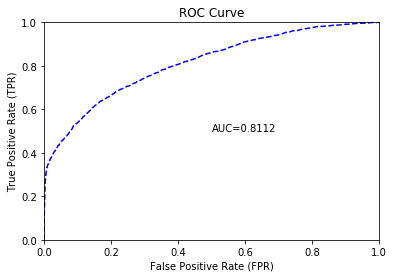


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.11335176029034896
RMSE: 0.33667753160902936
LogLoss: 0.3736020661213917
Null degrees of freedom: 9693
Residual degrees of freedom: 9687
Null deviance: 9881.316436560082
Residual deviance: 7243.396857961541
AIC: 7257.396857961541
AUC: 0.811242080208893
Gini: 0.622484160417786
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31125620760799566: 


,0,1,Error,Rate
0,7025.0,665.0,0.0865,(665.0/7690.0)
1,959.0,1045.0,0.4785,(959.0/2004.0)
Total,7984.0,1710.0,0.1675,(1624.0/9694.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3112562,0.5627356,205.0
max f2,0.1251160,0.6379227,319.0
max f0point5,0.6863036,0.6766693,87.0
max accuracy,0.6580272,0.8557871,93.0
max precision,0.9798294,1.0,0.0
max recall,0.0545508,1.0,398.0
max specificity,0.9798294,1.0,0.0
max absolute_mcc,0.6863036,0.4979661,87.0
max min_per_class_accuracy,0.1548551,0.7225549,294.0
max mean_per_class_accuracy,0.2091337,0.7344881,258.0


Gains/Lift Table: Avg response rate: 20.67 %, avg score: 21.28 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100062,0.9678910,4.8373253,4.8373253,1.0,0.9729295,1.0,0.9729295,0.0484032,0.0484032,383.7325349,383.7325349
,2,0.0200124,0.9596677,4.7375867,4.7874560,0.9793814,0.9640190,0.9896907,0.9684743,0.0474052,0.0958084,373.7586682,378.7456016
,3,0.0300186,0.9485869,4.5879787,4.7209636,0.9484536,0.9540919,0.9759450,0.9636801,0.0459082,0.1417166,358.7978682,372.0963571
,4,0.0400248,0.9336507,4.5381093,4.6752500,0.9381443,0.9409299,0.9664948,0.9579926,0.0454092,0.1871257,353.8109348,367.5250015
,5,0.0500309,0.9112650,4.4882400,4.6378480,0.9278351,0.9240298,0.9587629,0.9512000,0.0449102,0.2320359,348.8240015,363.7848015
,6,0.1000619,0.5308444,3.1218203,3.8798341,0.6453608,0.7189866,0.8020619,0.8350933,0.1561876,0.3882236,212.1820277,287.9834146
,7,0.1499897,0.3592421,1.7590274,3.1738710,0.3636364,0.4295407,0.6561210,0.7000951,0.0878244,0.4760479,75.9027400,217.3870965
,8,0.2000206,0.2724978,1.4960800,2.7542069,0.3092784,0.3129133,0.5693657,0.6032497,0.0748503,0.5508982,49.6080005,175.4206903
,9,0.2999794,0.1863141,1.1631546,2.2240385,0.2404541,0.2234462,0.4597662,0.4766921,0.1162675,0.6671657,16.3154599,122.4038512
,10,0.4000413,0.1416189,0.8278309,1.8748066,0.1711340,0.1614617,0.3875709,0.3978438,0.0828343,0.75,-17.2169064,87.4806601


In [48]:
aml.leader.model_performance(test_data=test).plot()
aml.leader.model_performance(test_data=test)

# Step 10 (of 10). Stop H2O-3 cluster

In [49]:
h2o.cluster().shutdown()

H2O session _sid_a94c closed.


# Bonus: Github location for this tutorial

* [This tutorial](https://github.com/h2oai/h2o-tutorials/tree/master/training/h2o_3_hands_on/lending_club_loan_default)
* [Other tutorials](https://github.com/h2oai/h2o-tutorials)

# Bonus: H2O-3 documentation

* http://docs.h2o.ai

# Bonus: Awesome H2O
Curated list of all the awesome projects, applications, research, tutorials, courses and books that use H2O:
* https://github.com/h2oai/awesome-h2o

#  Bonus: Help for Python H2OFrame object

In [50]:
help(h2o.H2OFrame)

Help on class H2OFrame in module h2o.frame:

class H2OFrame(builtins.object)
 |  H2OFrame(python_obj=None, destination_frame=None, header=0, separator=',', column_names=None, column_types=None, na_strings=None)
 |  
 |  Primary data store for H2O.
 |  
 |  H2OFrame is similar to pandas' ``DataFrame``, or R's ``data.frame``. One of the critical distinction is that the
 |  data is generally not held in memory, instead it is located on a (possibly remote) H2O cluster, and thus
 |  ``H2OFrame`` represents a mere handle to that data.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self)
 |      # unops
 |  
 |  __add__(self, rhs)
 |      # Binary operations
 |  
 |  __and__(self, rhs)
 |  
 |  __contains__(self, lhs)
 |  
 |  __div__(self, rhs)
 |  
 |  __eq__(self, rhs)
 |      Return self==value.
 |  
 |  __float__(self)
 |  
 |  __floordiv__(self, rhs)
 |  
 |  __ge__(self, rhs)
 |      Return self>=value.
 |  
 |  __getitem__(self, item)
 |      Frame slicing, supports row and column sl